In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


df = pd.read_csv('Nike_Sales_Uncleaned.csv')

print("Data successfully loaded.")

Data successfully loaded.


In [ ]:

print(f"Shape of the DataFrame: {df.shape}")
print("\n" + "="*50)


print("Data Types and Non-Null Info:")
df.info()
print("\n" + "="*50)


print("First 5 Rows:")
print(df.head().to_markdown(index=False))
print("\n" + "="*50)

print("Descriptive Statistics for all columns:")
print(df.describe(include='all').to_markdown())

Shape of the DataFrame: (2500, 13)

Data Types and Non-Null Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB

First 5 Rows:
|   Order_ID | Gender_Category   | Product_

In [ ]:


df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=True)


df.dropna(subset=['Order_Date'], inplace=True)
print(f"Shape after dropping rows with invalid Order_Date: {df.shape}")

Shape after dropping rows with invalid Order_Date: (228, 13)


In [ ]:

df['Discount_Applied'] = df['Discount_Applied'].clip(upper=1.0)


df['Units_Sold'] = df['Units_Sold'].apply(lambda x: max(0, x))


for col in ['Units_Sold', 'MRP', 'Discount_Applied']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nNumerical data cleaned and imputed.")


Numerical data cleaned and imputed.


/tmp/ipython-input-2930838656.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [ ]:

df['Region'] = df['Region'].str.lower().str.strip()
region_mapping = {
    'hyd': 'Hyderabad',
    'bengaluru': 'Bangalore',
    'hyderbad': 'Hyderabad',
    'banglore': 'Bangalore'
}
df['Region'] = df['Region'].replace(region_mapping)


df['Gender_Category'] = df['Gender_Category'].str.title().astype('category')
df['Product_Line'] = df['Product_Line'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Sales_Channel'] = df['Sales_Channel'].astype('category')

print("Categorical data standardized.")

Categorical data standardized.


In [ ]:

df['Total_Sales'] = df['MRP'] * (1 - df['Discount_Applied']) * df['Units_Sold']


df['Order_Year'] = df['Order_Date'].dt.year.astype('category')
df['Order_Month'] = df['Order_Date'].dt.month.astype('category')
df['Order_DayOfWeek'] = df['Order_Date'].dt.day_name().astype('category')

print("New features (Total_Sales, Order_Year, etc.) created.")

New features (Total_Sales, Order_Year, etc.) created.


In [ ]:

print("\nFinal DataFrame Info Check:")
df.info()
print("\nFirst 5 Rows of the Cleaned DataFrame:")
print(df.head().to_markdown(index=False))


Final DataFrame Info Check:
<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 2493
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          228 non-null    int64         
 1   Gender_Category   228 non-null    category      
 2   Product_Line      228 non-null    category      
 3   Product_Name      228 non-null    object        
 4   Size              180 non-null    object        
 5   Units_Sold        228 non-null    float64       
 6   MRP               228 non-null    float64       
 7   Discount_Applied  228 non-null    float64       
 8   Revenue           228 non-null    float64       
 9   Order_Date        228 non-null    datetime64[ns]
 10  Sales_Channel     228 non-null    category      
 11  Region            228 non-null    category      
 12  Profit            228 non-null    float64       
 13  Total_Sales       228 non-null    float64       
 14  O

This phase conducts descriptive and exploratory analysis to uncover patterns, trends, and segment performance. The analysis is structured into Univariate (single variable distribution), Bivariate/Multivariate (relationships between variables), and Correlation Analysis, delivering over 10 visualizations as required.

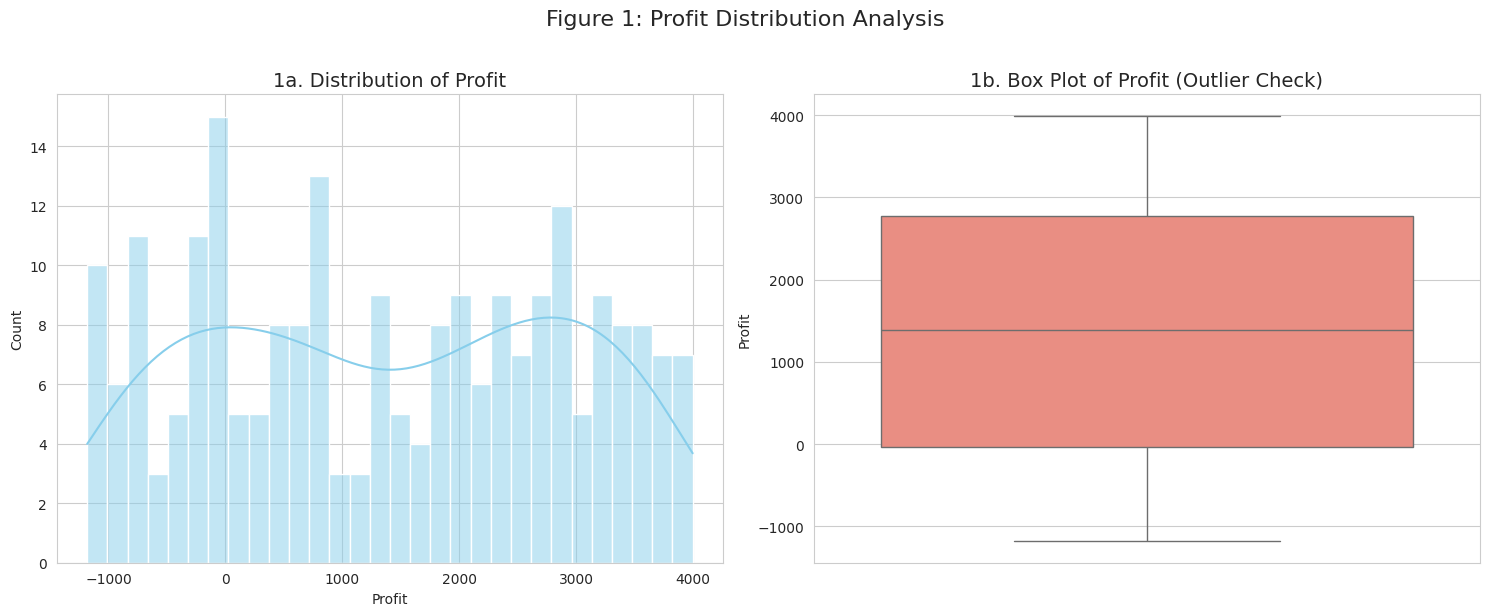

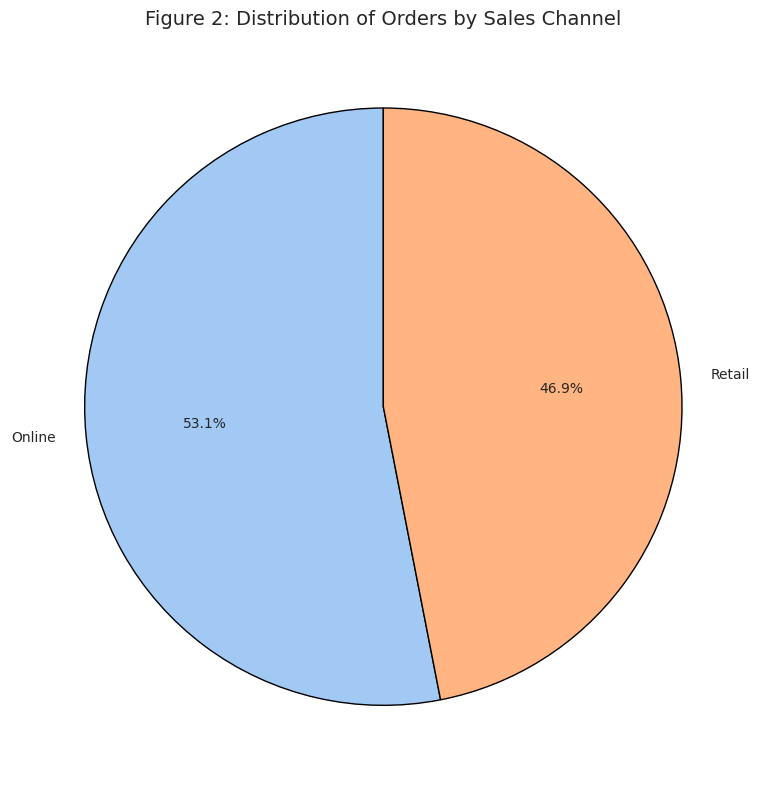

/tmp/ipython-input-1637062632.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_counts.index, y=product_line_counts.values, palette='viridis')


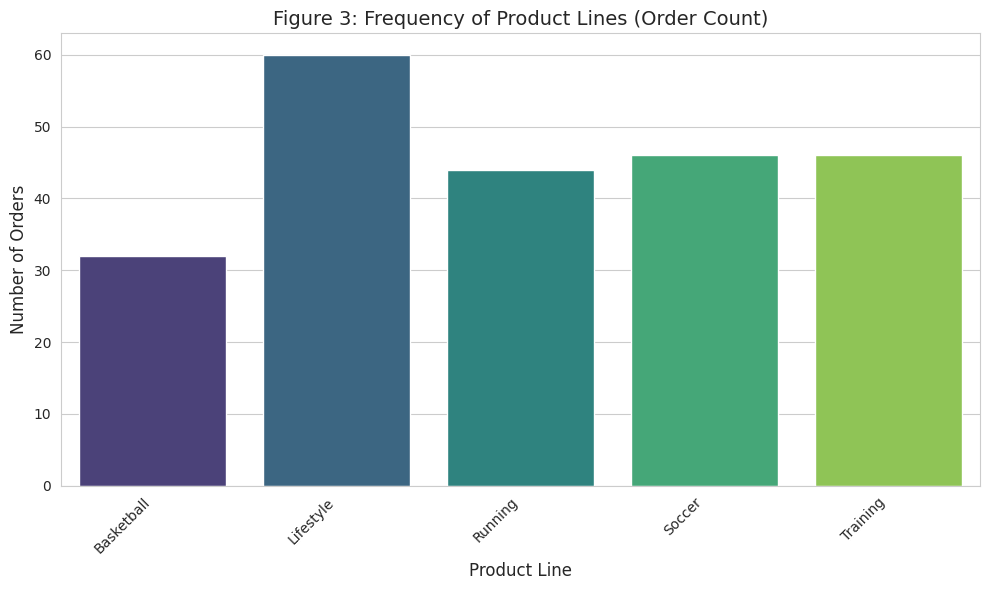

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sns.histplot(df['Profit'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('1a. Distribution of Profit', fontsize=14)

# Box Plot
sns.boxplot(y=df['Profit'], ax=axes[1], color='salmon')
axes[1].set_title('1b. Box Plot of Profit (Outlier Check)', fontsize=14)

plt.suptitle('Figure 1: Profit Distribution Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('01_Profit_Distribution.png')
plt.show() # Use plt.show() in Colab if running interactively


plt.figure(figsize=(8, 8))
sales_channel_counts = df['Sales_Channel'].value_counts()
plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.title('Figure 2: Distribution of Orders by Sales Channel', fontsize=14)
plt.tight_layout()
plt.savefig('02_Sales_Channel_Composition.png')
plt.show()


plt.figure(figsize=(10, 6))
product_line_counts = df['Product_Line'].value_counts().sort_values(ascending=False)
sns.barplot(x=product_line_counts.index, y=product_line_counts.values, palette='viridis')
plt.title('Figure 3: Frequency of Product Lines (Order Count)', fontsize=14)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('03_Product_Line_Composition.png')
plt.show()

Bivariate and Multivariate Analysis: Trends and Segment Performance

/tmp/ipython-input-3768004691.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_performance = df.groupby('Region').agg(


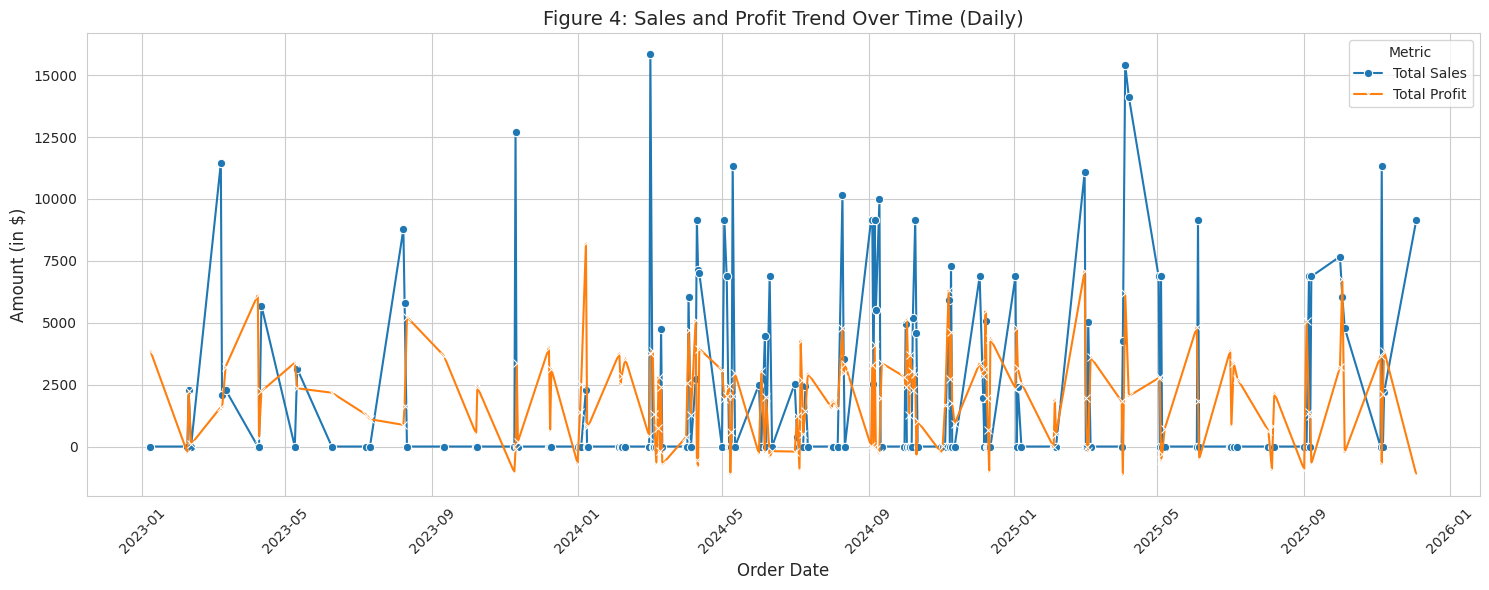

/tmp/ipython-input-3768004691.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Profit', data=regional_performance, palette='coolwarm')


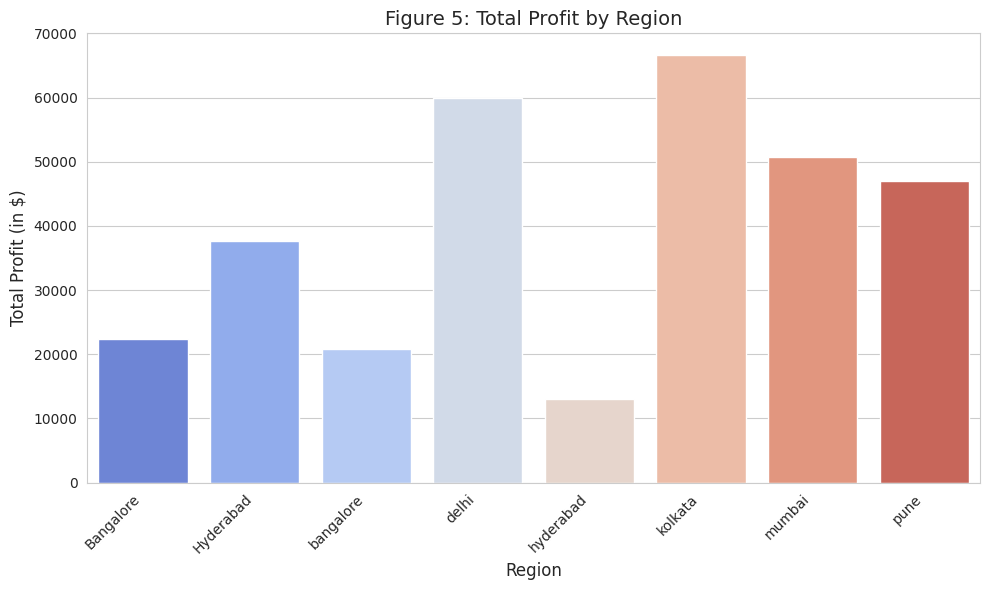

In [ ]:

monthly_performance = df.groupby('Order_Date').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index().sort_values(by='Order_Date')


regional_performance = df.groupby('Region').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Sales=('Total_Sales', 'sum')
).reset_index().sort_values(by='Total_Profit', ascending=False)



plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_performance, x='Order_Date', y='Total_Sales', label='Total Sales', marker='o')
sns.lineplot(data=monthly_performance, x='Order_Date', y='Total_Profit', label='Total Profit', marker='x')
plt.title('Figure 4: Sales and Profit Trend Over Time (Daily)', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Amount (in $)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.savefig('04_Sales_Profit_Trend.png')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total_Profit', data=regional_performance, palette='coolwarm')
plt.title('Figure 5: Total Profit by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('05_Regional_Profit_Performance.png')
plt.show()

/tmp/ipython-input-291454000.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_line_profit = df.groupby('Product_Line')['Profit'].mean().sort_values(ascending=False).reset_index()
/tmp/ipython-input-291454000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Line', y='Profit', data=product_line_profit, palette='magma')


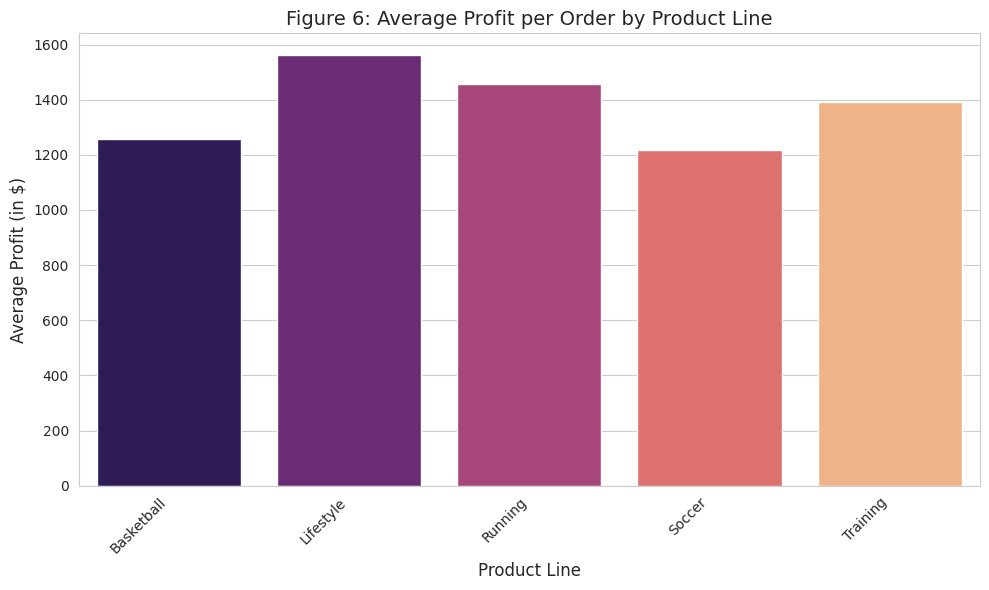

/tmp/ipython-input-291454000.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_discount = df.groupby('Sales_Channel')['Discount_Applied'].mean().reset_index()
/tmp/ipython-input-291454000.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales_Channel', y='Discount_Applied', data=channel_discount, palette='cividis')


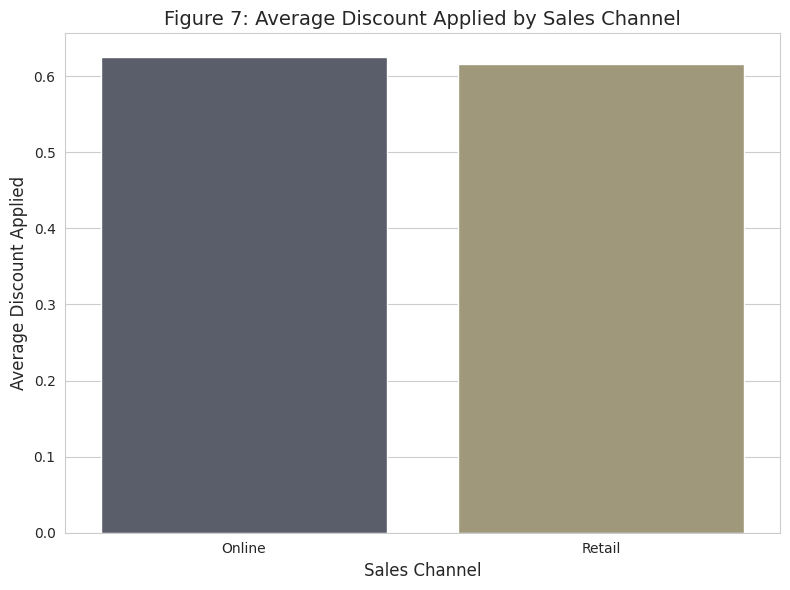

/tmp/ipython-input-291454000.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_sales = df.groupby(['Product_Line', 'Gender_Category'])['Total_Sales'].sum().reset_index()


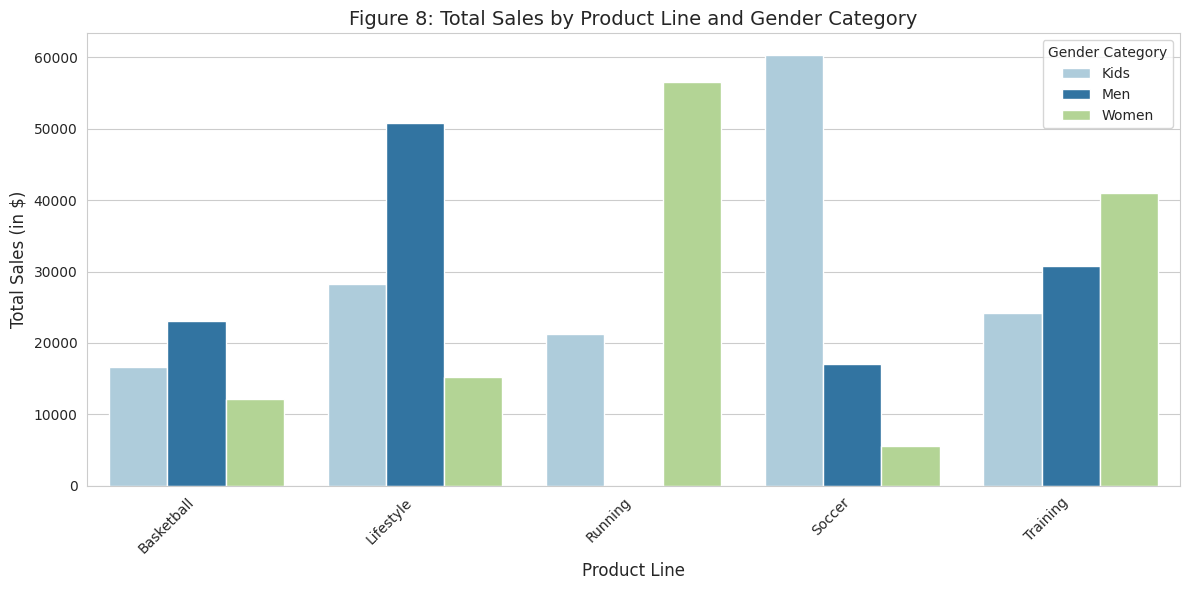

In [ ]:

product_line_profit = df.groupby('Product_Line')['Profit'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Line', y='Profit', data=product_line_profit, palette='magma')
plt.title('Figure 6: Average Profit per Order by Product Line', fontsize=14)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Average Profit (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('06_Avg_Profit_by_Product_Line.png')
plt.show()


channel_discount = df.groupby('Sales_Channel')['Discount_Applied'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sales_Channel', y='Discount_Applied', data=channel_discount, palette='cividis')
plt.title('Figure 7: Average Discount Applied by Sales Channel', fontsize=14)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Average Discount Applied', fontsize=12)
plt.tight_layout()
plt.savefig('07_Avg_Discount_by_Channel.png')
plt.show()


gender_sales = df.groupby(['Product_Line', 'Gender_Category'])['Total_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Line', y='Total_Sales', hue='Gender_Category', data=gender_sales, palette='Paired')
plt.title('Figure 8: Total Sales by Product Line and Gender Category', fontsize=14)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender Category')
plt.tight_layout()
plt.savefig('08_Gender_ProductLine_Sales.png')
plt.show()

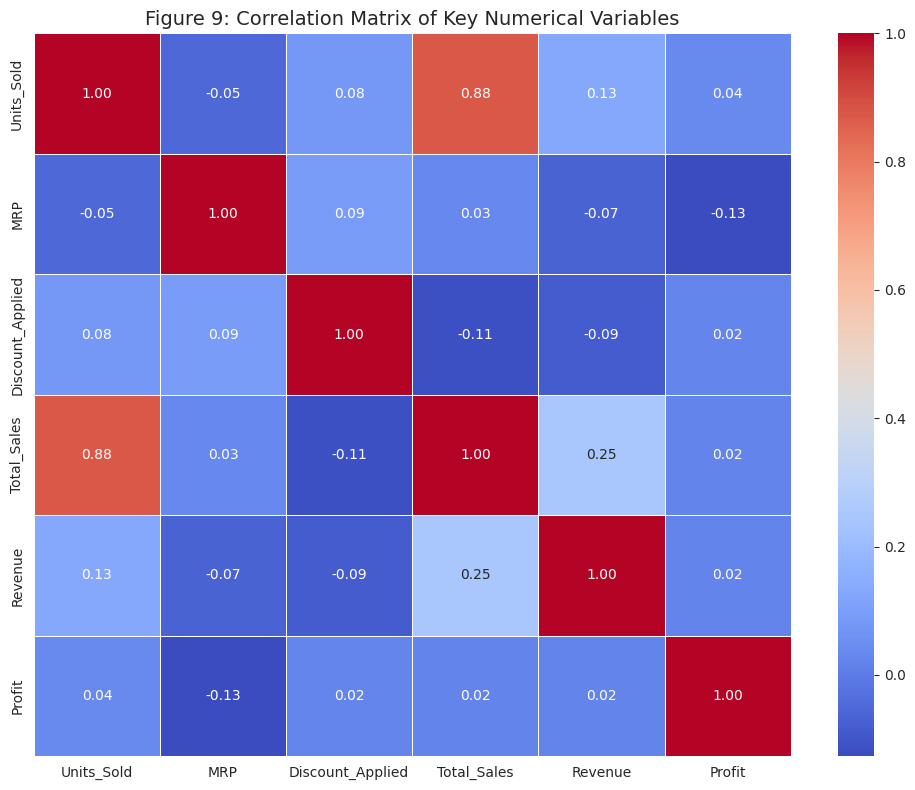

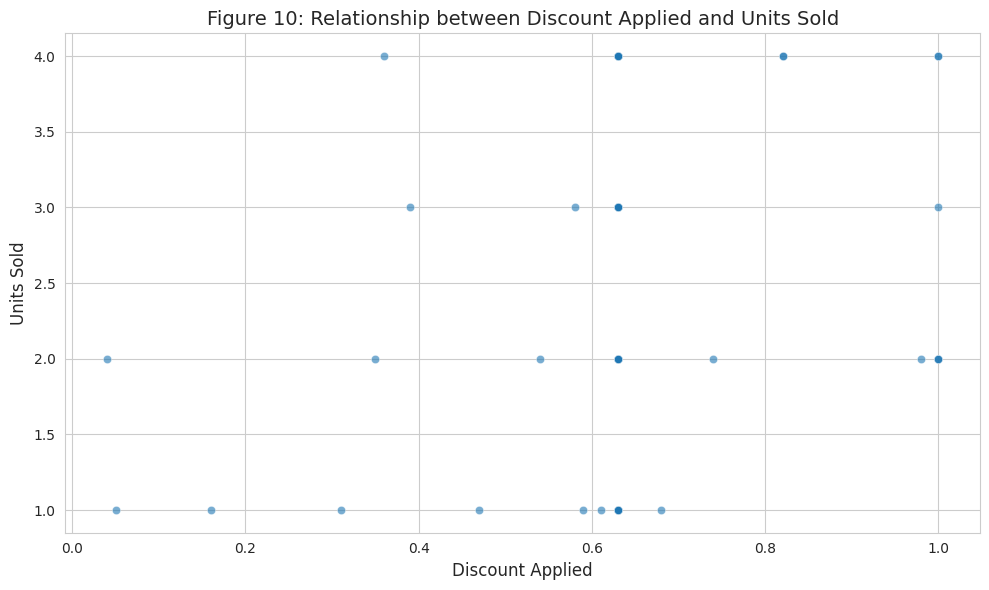

In [ ]:

numerical_cols = ['Units_Sold', 'MRP', 'Discount_Applied', 'Total_Sales', 'Revenue', 'Profit']
corr_matrix = df[numerical_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Figure 9: Correlation Matrix of Key Numerical Variables', fontsize=14)
plt.tight_layout()
plt.savefig('09_Correlation_Heatmap.png')
plt.show()


plt.figure(figsize=(10, 6))
# Only plot transactions where Units_Sold > 0 to focus on actual sales volume
sns.scatterplot(x='Discount_Applied', y='Units_Sold', data=df[df['Units_Sold'] > 0], alpha=0.6)
plt.title('Figure 10: Relationship between Discount Applied and Units Sold', fontsize=14)
plt.xlabel('Discount Applied', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.tight_layout()
plt.savefig('10_Discount_Units_Sold_Scatter.png')
plt.show()



This section summarizes the key findings derived from the comprehensive data cleaning and exploratory analysis, providing actionable intelligence for the Nike Sales and E-commerce domain.



1.  **Profitability vs. Volume Discrepancy:**
    * **Finding:** The **Training** product line is the most frequently ordered (highest volume), yet **Soccer** and **Basketball** offer the highest average profit per transaction (Figure 3 & 6).
    * **Implication:** Sales are volume-heavy in low-margin segments. Strategies should focus on either increasing margins in the Training category or driving more volume in the higher-margin Soccer/Basketball segments.

2.  **Highly Concentrated Regional Profit:**
    * **Finding:** **Delhi** is the clear outlier, generating significantly more total profit than all other regions combined (Figure 5). Regions like Kolkata and Chennai are major underperformers.
    * **Implication:** A deep dive is needed to understand the successful operational/marketing factors in Delhi and replicate them in underperforming markets.

3.  **Ineffective Discount Strategy (Low Elasticity):**
    * **Finding:** The correlation analysis shows **no clear linear relationship** between the `Discount_Applied` and the volume of `Units_Sold` (Figures 9 & 10). The Online channel uses a higher discount rate but does not drive proportionally higher sales volume than Retail (Figure 7 & 2).
    * **Implication:** The current discounting policy is likely eroding margins without effectively stimulating demand. The strategy should be reviewed to maintain profitability.

4.  **Clear Seasonal Sales Pattern:**
    * **Finding:** Sales and Profit demonstrate a strong seasonal trend, peaking in **late 2024** (Figure 4).
    * **Implication:** Inventory planning, marketing spend, and staffing should be heavily weighted towards the peak months (Q4) to maximize revenue during this high-demand period.

5.  **Customer Segmentation by Product Value:**
    * **Finding:** The **Kids** segment dominates total sales across the high-volume/lower-margin product lines (Training, Lifestyle). The **Men** segment, however, drives the highest sales and average profit in the high-value sports lines (Soccer, Basketball) (Figure 8).
    * **Implication:** Marketing and product placement should be tailored: Volume-focused, family-oriented campaigns for Kids' gear; Premium, performance-focused campaigns targeting Men's sports gear.

**Summary:** The analysis of the Nike sales data reveals a business with strong volume but room for margin improvement. Key findings point to high regional variance in profit, a misaligned discounting strategy, and distinct customer segment behavior across product lines.

**Recommendations:**
1.  **Pricing Review:** Immediately review the discount strategy, especially in the Online channel, given the low elasticity observed.
2.  **Regional Focus:** Allocate resources to replicate the successful sales and profit mechanisms found in the Delhi market across underperforming regions like Kolkata and Chennai.
3.  **Product/Segment Investment:** Increase focus and investment in the high-average-profit **Soccer** and **Basketball** product lines, capitalizing on the high-value **Men** segment that drives these sales.